<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3 - Web APIs & NLP (Part 2 - Data Cleaning and EDA)

## 1. Import libraries and datasets

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from sklearn.feature_extraction.text import CountVectorizer

# Set seaborn library options
sns.set_style('darkgrid')
sns.set_context('notebook',1)

# Set viewing options
pd.set_option("max_columns", None)
pd.set_option("max_rows", None)
pd.set_option('max_colwidth', 200)

In [2]:
# Import r/datascience and r/digitalmarketing submissions

ds_df = pd.read_csv("../data/ds_subreddit_submissions", low_memory=False)
dm_df = pd.read_csv("../data/dm_subreddit_submissions", low_memory=False)

In [3]:
ds_df.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,author_premium,awarders,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_created_from_ads_ui,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_css_class,link_flair_richtext,link_flair_template_id,link_flair_text,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,pwls,retrieved_on,score,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,suggested_sort,thumbnail,title,total_awards_received,treatment_tags,upvote_ratio,url,whitelist_status,wls,poll_data,post_hint,preview,thumbnail_height,thumbnail_width,url_overridden_by_dest,crosspost_parent,crosspost_parent_list,media,media_embed,secure_media,secure_media_embed,author_flair_background_color,author_flair_text_color,media_metadata,removed_by_category,is_gallery,distinguished,author_cakeday,gallery_data,author_flair_template_id,edited,banned_by
0,[],False,Passion_369,NaN,[],NaN,text,t2_6joc8fq7,False,False,False,[],False,False,1646318273,self.datascience,https://www.reddit.com/r/datascience/comments/t5sz8q/hello_everyone_what_are_the_different_methods_and/,{},t5sz8q,False,True,False,False,False,True,True,False,NaN,discussion,[],4fad7108-d77d-11e7-b0c6-0ee69f155af2,Discussion,dark,text,False,False,True,0,0,False,all_ads,/r/datascience/comments/t5sz8q/hello_everyone_what_are_the_different_methods_and/,False,6,1646318284,1,NaN,True,False,False,datascience,t5_2sptq,704226,public,confidence,self,"Hello everyone, what are the different methods and algorithms for model aggregation in federated learning? Can anyone help with any resource/articles...?",0,[],1.0,https://www.reddit.com/r/datascience/comments/t5sz8q/hello_everyone_what_are_the_different_methods_and/,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,TobogganFetish,NaN,[],NaN,text,t2_6q7dq,False,False,False,[],False,False,1646316403,self.datascience,https://www.reddit.com/r/datascience/comments/t5sc5u/is_it_worth_starting_data_science_as_an/,{},t5sc5u,False,True,False,False,False,True,True,False,NaN,career,[],a6ee6fa0-d780-11e7-b6d0-0e0bd8823a7e,Career,dark,text,False,False,True,0,0,False,all_ads,/r/datascience/comments/t5sc5u/is_it_worth_starting_data_science_as_an/,False,6,1646316414,1,"For context, I've worked with data for 10 years but mostly in analysis/reporting roles. I've recently moved into a people manager position at a Fortune 500 company in data management. In parallel,...",True,False,False,datascience,t5_2sptq,704203,public,confidence,self,Is it worth starting Data Science as an Individual Contributor?,0,[],1.0,https://www.reddit.com/r/datascience/comments/t5sc5u/is_it_worth_starting_data_science_as_an/,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,Malcolm101,NaN,[],NaN,text,t2_1hqlqa2v,False,False,False,[],False,False,1646310679,self.datascience,https://www.reddit.com/r/datascience/comments/t5qk8a/imputing_features_like_ratings_and_rankings/,{},t5qk8a,False,True,False,False,False,True,True,False,NaN,education,[],99f9652a-d780-11e7-b558-0e52cdd59ace,Education,dark,text,False,False,True,0,0,False,all_ads,/r/datascience/comments/t5qk8a/imputing_features_like_ratings_and_rankings/,False,6,1646310689,1,Can any one tell how to deal with null values for rankings and ratings features in a movie revenue dataset. \nI was thinking of imputing with mean values for groupings based on Genre but that does...,True,False,False,datascience,t5_2sptq,704145,public,confidence,self,Imputing features like ratings and rankings,0,[],1.0,https://www.reddit.com/r/datascience/comments/t5qk8a

In [4]:
ds_df.shape

(19692, 86)

In [5]:
dm_df.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,author_premium,awarders,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_created_from_ads_ui,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_richtext,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,pwls,removed_by_category,retrieved_on,score,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail,title,total_awards_received,treatment_tags,upvote_ratio,url,whitelist_status,wls,post_hint,preview,author_cakeday,crosspost_parent,crosspost_parent_list,url_overridden_by_dest,thumbnail_height,thumbnail_width,author_flair_background_color,author_flair_text_color,banned_by,edited,gilded,distinguished,steward_reports,removed_by,updated_utc,og_description,og_title
0,[],False,June_Born,NaN,[],NaN,text,t2_ehakld5x,False,False,False,[],False,False,1646351513,self.DigitalMarketing,https://www.reddit.com/r/DigitalMarketing/comments/t658un/online_product_reviews/,{},t658un,False,False,False,False,False,False,True,False,NaN,[],dark,text,False,False,True,1,0,False,all_ads,/r/DigitalMarketing/comments/t658un/online_product_reviews/,False,6,moderator,1646351524,1,[removed],True,False,False,DigitalMarketing,t5_2s3d6,76069,public,self,Online Product Reviews,0.0,[],1.0,https://www.reddit.com/r/DigitalMarketing/comments/t658un/online_product_reviews/,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,throwawaygal1992,NaN,[],NaN,text,t2_4rhow1dx,False,False,False,[],False,False,1646349722,self.DigitalMarketing,https://www.reddit.com/r/DigitalMarketing/comments/t64mvc/does_anything_other_than_a_com_like_a_live_org_or/,{},t64mvc,False,True,False,False,False,True,True,False,NaN,[],dark,text,False,False,True,0,0,False,all_ads,/r/DigitalMarketing/comments/t64mvc/does_anything_other_than_a_com_like_a_live_org_or/,False,6,NaN,1646349733,1,NaN,True,False,False,DigitalMarketing,t5_2s3d6,76068,public,self,"Does anything other than a .com, like a .live .org or .net mess up with your SEO rankings on Google?",0.0,[],1.0,https://www.reddit.com/r/DigitalMarketing/comments/t64mvc/does_anything_other_than_a_com_like_a_live_org_or/,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,catsandblankets,NaN,[],NaN,text,t2_elfob,False,False,False,[],False,False,1646341258,self.DigitalMarketing,https://www.reddit.com/r/DigitalMarketing/comments/t61lxq/we_share_courses_guides_often_here_but_what_would/,{},t61lxq,False,True,False,False,False,True,True,False,NaN,[],dark,text,False,False,True,0,0,False,all_ads,/r/DigitalMarketing/comments/t61lxq/we_share_courses_guides_often_here_but_what_would/,False,6,NaN,1646341269,1,"The company I work for was a 10m/yr wholesale CPG company which grew to a 30m/yr as soon as they established a marketing role (me), and is now in mass retail with a pretty solid following.\n\nWe d...",True,False,False,DigitalMarketing,t5_2s3d6,76061,public,self,"We share courses &amp; guides often here, but what would you suggest is a good 101 video that I can share with the owners who who need a basic understanding of where their money is going and why D...",0.0,[],1.0,https://www.reddit.com/r/DigitalMarketing/comments/t61lxq/we_share_courses_guides_often_here_but_what_would/,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,hasinul_babu,NaN,[],NaN,text,t2_j7xpnyul,False,False,False,[],False,False,1646340350,self.DigitalMarketing,https://www.reddit.com/r/DigitalMarketing/comments/t619rx/how_to_create_a_fiverr_gig_video_using_powerpoint/,{},t619rx,False,False,False,False,False,False,True,False,N

In [6]:
dm_df.shape

(19697, 79)

## 2. Data Cleaning

#### 2.1 Dealing with missing values in the r/datascience dataframe

In [7]:
# Extract out the relevant columns for further data cleaning
ds_df = ds_df[['title', 'selftext', 'subreddit']]

In [8]:
ds_df.head()

,title,selftext,subreddit
0,"Hello everyone, what are the different methods and algorithms for model aggregation in federated learning? Can anyone help with any resource/articles...?",NaN,datascience
1,Is it worth starting Data Science as an Individual Contributor?,"For context, I've worked with data for 10 years but mostly in analysis/reporting roles. I've recently moved into a people manager position at a Fortune 500 company in data management. In parallel,...",datascience
2,Imputing features like ratings and rankings,Can any one tell how to deal with null values for rankings and ratings features in a movie revenue dataset. \nI was thinking of imputing with mean values for groupings based on Genre but that does...,datascience
3,Best way to deal with missing/empty data in a small dataset,"Hi. Potentially a simple, recurring questions here..\n\nI have a small dataset with around 10k rows. It has several columns, two of which have around 1.4k null values (no common null values betwee...",datascience
4,Curious how many of us work with data streaming or data batch,What are your thoughts on those two?\n\n[View Poll](https://www.reddit.com/poll/t5ose6),datascience


In [9]:
# identify number of rows with null values for each feature
ds_df.isnull().sum()

title           0
selftext     3485
subreddit       0
dtype: int64

I intend to analyze text collectively from both the 'title' and 'selftext' columns, therefore I will retain those rows with null values in the 'selftext' column, and replace them with an empty string instead.

The rationale for this is the possibility of the authors just posting everything under 'title' if they choose not to elaborate under the selftext column. Thus, we will treat both columns collectively as the input from the user.

In [10]:
# Replace all null values under 'selftext' column with empty string
ds_df['selftext'].replace(np.nan,'',inplace=True)
ds_df.isnull().sum()

title        0
selftext     0
subreddit    0
dtype: int64

Some of the submissions under 'selftext' column were removed or deleted. However, the 'title' data is still available. Therefore I will keep these row data but replace the '\[removed\]' and '\[deleted\]' tags with an empty string, similar as above.

In [11]:
# Replace all '[removed]' values under 'selftext' column with empty string
ds_df['selftext'].replace('[removed]', '',inplace=True)

# Replace all '[deleted]' values under 'selftext' column with empty string
ds_df['selftext'].replace('[deleted]', '',inplace=True)

There are some rows with the same data in both the 'title' and 'selftext' columns. The duplicates will be removed to have a better representation of the dataset.

In [12]:
## Remove duplicate rows (same values in 'title' and 'selftext')
ds_df.drop_duplicates(subset=['title','selftext'], keep='first', inplace=True)

There are still some values under the 'selftext' column that look almost identical but were not picked up earlier. These values still have the same 'title'. Looking at these (near) duplicates, I decided not to drop these duplicates as I do not want to risk dropping valuable information, since having duplicate data should not affect our model too much. Besides, it will be near-impossible to truly remove all of such duplicates.

In [13]:
# Decided not to drop (near)
# View all duplicates (keep='False') under 'title' column
# ds_df[ds_df.duplicated(subset='title', keep=False)]

#### 2.2 Remove unnecessary information from r/datascience dataframe

In [14]:
# function to remove URL links from text
def remove_url(text):
    return re.sub(r"http\S+", "", text)

In [15]:
# function to remove newline characters from text
def remove_newline(text):
    return text.replace('\n','')

In [15]:
# function to remove '[View Poll]' from text
def remove_viewpoll(text):
    return text.replace('[View Poll]','')

There are many irrelevant information such as URLs, newline characters '\n' and '\[View Poll\]'. These characters will be removed from the 'title' and 'selftext' columns with the self-defined functions.

In [16]:
# remove URL links from dataframe
ds_df['title'] = ds_df['title'].map(lambda text: remove_url(text))
ds_df['selftext'] = ds_df['selftext'].map(lambda text: remove_url(text))

# remove newline characters from dataframe
ds_df['title'] = ds_df['title'].map(lambda text: remove_newline(text))
ds_df['selftext'] = ds_df['selftext'].map(lambda text: remove_newline(text))

# remove '[View Poll]' from dataframe
ds_df['title'] = ds_df['title'].map(lambda text: remove_viewpoll(text))
ds_df['selftext'] = ds_df['selftext'].map(lambda text: remove_viewpoll(text))

In [17]:
ds_df.shape

(19309, 3)

#### 2.3 Dealing with missing values in the r/digitalmarketing dataframe

In [18]:
# Extract out the relevant columns for further data cleaning
dm_df = dm_df[['title', 'selftext', 'subreddit']]

In [19]:
#identify number of rows with null values for each feature
dm_df.isnull().sum()

title           0
selftext     1062
subreddit       0
dtype: int64

Again, I will not drop submissions/rows just because there are null values, since there may be valuable information under the 'title' column. These null values will be replaced with an empty string.

In [20]:
# Replace all null values under 'selftext' column with empty string
dm_df['selftext'].replace(np.nan,'',inplace=True)
dm_df.isnull().sum()

title        0
selftext     0
subreddit    0
dtype: int64

I will also replace '\[removed\]' and '\[deleted\]' values under 'selftext' column with an empty string, and remove duplicates in both the 'title' and 'selftext' columns, as with the r/datascience dataframe.

In [21]:
# Replace all '[removed]' values under 'selftext' column with empty string
dm_df['selftext'].replace('[removed]', '',inplace=True)

# Replace all '[deleted]' values under 'selftext' column with empty string
dm_df['selftext'].replace('[deleted]', '',inplace=True)

## Remove duplicate rows (same values in 'title' and 'selftext')
dm_df.drop_duplicates(subset=['title','selftext'], keep='first', inplace=True)

#### 2.4 Remove unnecessary information from r/digitalmarketing dataframe

Let's remove all the irrelevant information such as URLs, newline characters '\n' and '\[View Poll\]'. I will remove these characters from the 'title' and 'selftext' columns with our self-defined functions.

In [22]:
# remove URL links from dataframe
dm_df['title'] = dm_df['title'].map(lambda text: remove_url(text))
dm_df['selftext'] = dm_df['selftext'].map(lambda text: remove_url(text))

# remove newline characters from dataframe
dm_df['title'] = dm_df['title'].map(lambda text: remove_newline(text))
dm_df['selftext'] = dm_df['selftext'].map(lambda text: remove_newline(text))

# remove '[View Poll]' from dataframe
dm_df['title'] = dm_df['title'].map(lambda text: remove_viewpoll(text))
dm_df['selftext'] = dm_df['selftext'].map(lambda text: remove_viewpoll(text))

In [23]:
dm_df.shape

(18765, 3)

#### 2.5 Combining dataframes
Now, let's combine the 2 dataframes into 1!

In [24]:
# concatenate dataframes from both subreddits into 1 single dataframe 
df = pd.concat([ds_df,dm_df], ignore_index=True)

In [25]:
df.tail()

,title,selftext,subreddit
38069,Best SEO company in Delhi NCR and Other Cities Worldwide,,DigitalMarketing
38070,SMO Company Delhi India Popularize your Product on Social Platforms,,DigitalMarketing
38071,What lead gen strategy do you use?,,DigitalMarketing
38072,(2018-2019) Advanced Link Building white hat #SEO Techniques to Rank on Google |,,DigitalMarketing
38073,digital marketing agency in Nigeria,,DigitalMarketing


## 3. EDA

Before vectorizing the text data, new columns indicating the length and total word count for the 'title', 'selftext' and 'all_text' of each submission will be created for exploratory data analysis purposes.

In [26]:
# create new columns for length of 'title', 'selftext' and 'all_text' columns
df['title_length'] = df['title'].map(len)
df['selftext_length'] = df['selftext'].map(len)

In [27]:
# create new columns for word counts of 'title', 'selftext' and 'all_text' columns
df['title_word_count'] = df['title'].map(lambda text: len(text.split()))
df['selftext_word_count'] = df['selftext'].map(lambda text: len(text.split()))

#### 3.1 Distribution of length and word counts of title, selftext and all_text columns

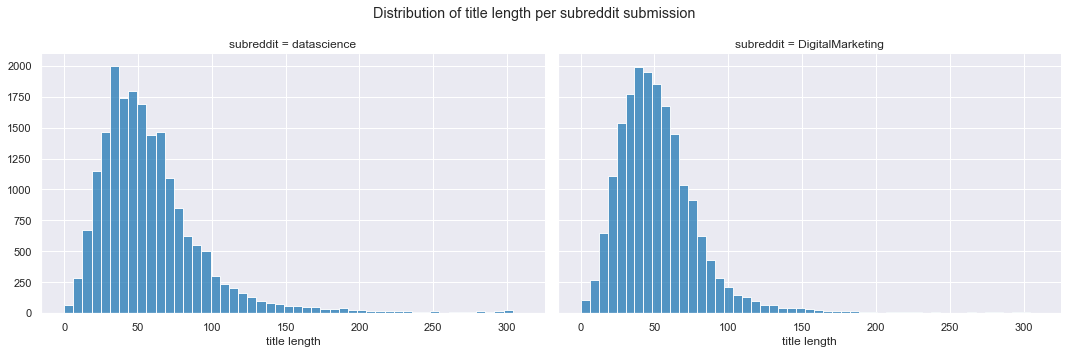

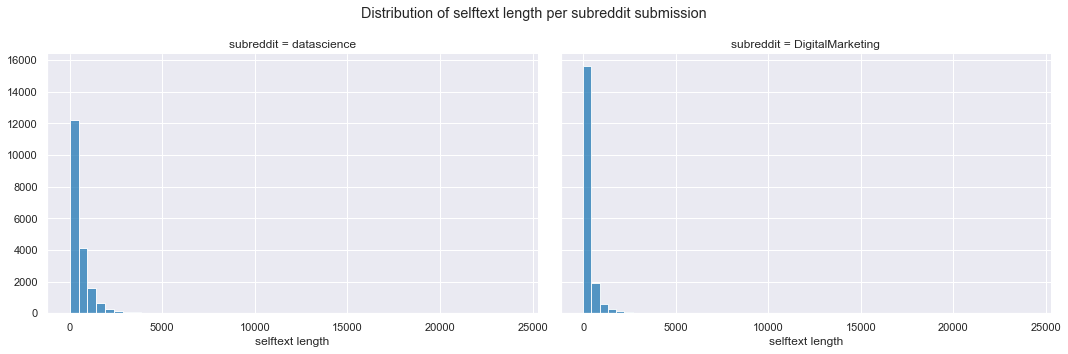

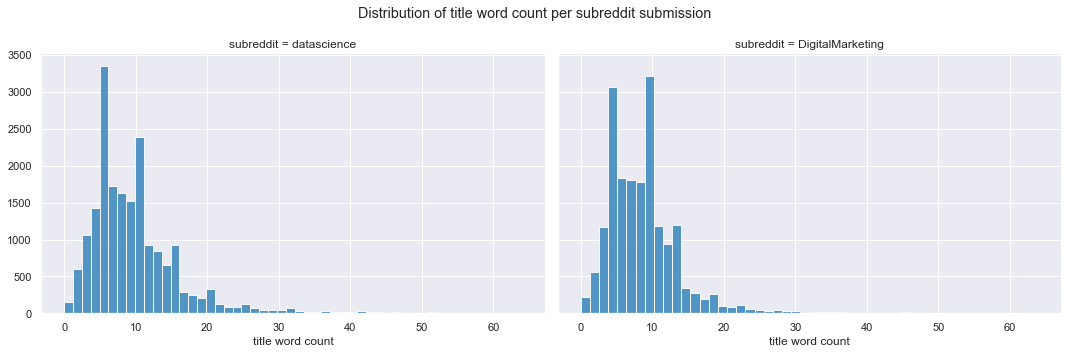

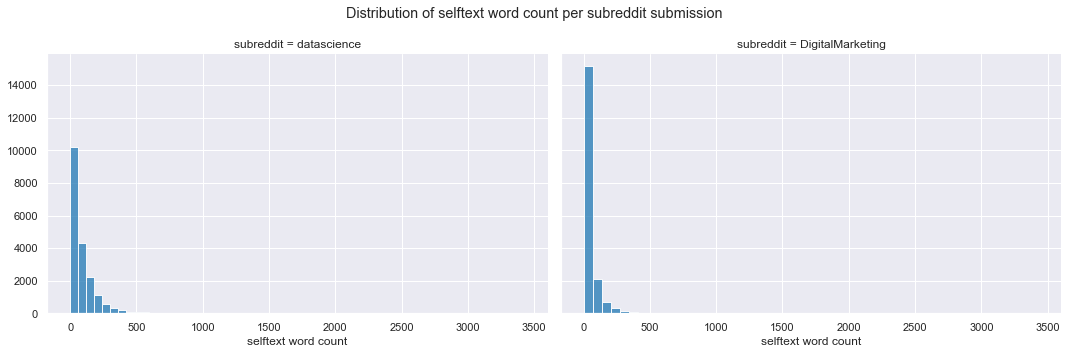

In [28]:
# FacetGrid of histograms to visualize distributions of features between both subreddits

for idx, col in enumerate(df.columns[3:]):
    
    g = sns.FacetGrid(df, col="subreddit", height=5, aspect=1.5)
    g.map(sns.histplot, col, bins=50);

    plt.suptitle(f"Distribution of {col.replace('_',' ')} per subreddit submission")
    g.set_axis_labels(col.replace('_',' '))
    plt.tight_layout()

plt.show();

FacetGrid is used to plot multiple histograms to compare the distributions of length and word counts for the 'title' and 'selftext' features. In addition, the distributions for both subreddits were juxtaposed for each of the features.

A quick overview of the distributions showed that there were no significant differences between both subreddits. For all the features, it is rather obvious that the distributions are right-skewed, with most submissions having shorter lengths and lower word counts, with a very low proportion of submissions having a much longer length and higher word counts. It seems to also suggest that the distribution for length and word count for the 'selftext' column may be more right-skewed for the DigitalMarketing subreddit as compared to the datascience subreddit.

#### 3.2 Summary Statistics

In [29]:
# summary statistics of r/datascience and r/digital marketing
df.groupby('subreddit').describe().T

subreddit                  DigitalMarketing   datascience
title_length        count      18765.000000  19309.000000
                    mean          53.493099     59.109534
                    std           31.259228     38.427435
                    min            0.000000      0.000000
                    25%           34.000000     35.000000
                    50%           49.000000     51.000000
                    75%           65.000000     72.000000
                    max          304.000000    310.000000
selftext_length     count      18765.000000  19309.000000
                    mean         240.933440    502.228080
                    std          721.415871    775.502228
                    min            0.000000      0.000000
                    25%            0.000000      0.000000
                    50%            0.000000    306.000000
                    75%          277.000000    682.000000
                    max        22255.000000  24070.000000
title_word_count    count      18765.000000  19309.000000
                    mean           8.791100      9.820757
                    std            5.570717      6.857198
                    min            0.000000      0.000000
                    25%            5.000000      5.000000
                    50%            8.000000      8.000000
                    75%           11.000000     12.000000
                    max           64.000000     62.000000
selftext_word_count count      18765.000000  19309.000000
                    mean          41.571223     86.529598
                    std          120.575264    127.209656
                    min            0.000000      0.000000
                    25%            0.000000      0.000000
                    50%            0.000000     54.000000
                    75%           48.000000    120.000000
                    max         3431.000000   2989.000000

From the above summary statistics, we can see that generally submissions under the datascience subreddit tend to be longer in both 'title' and particularly evident under 'selftext'.

#### 3.3 Dealing with outliers

Although the distributions seem to be highly skewed by some outliers with very long lengths and high word counts, I will not attempt to remove any of these outliers.

Firstly, users may have different preferences to either utilize both the 'title' and 'selftext' columns, or to input everything under the 'title' column. To have a more reliable dataset, rows with much higher lengths and word counts will be kept for complete inputs by the users.

Secondly, having outliers in terms of length and word counts will probably not affect the model accuracy adversely.

## 4. Export cleaned dataframe for modelling

I will combine text data from the 'title' and 'selftext' columns into a new 'all_text' column, and remove unnecessary features as they were only required for EDA purposes. Essentially, only the 'all_text' and 'subreddit' columns will be useful for the modelling.

In [30]:
# create new 'all_text' column that contains all text data for each submission
df['all_text'] = df['title'] + ' ' + df['selftext']

In [31]:
# keep only 'all_text' and 'subreddit' columns for modelling
df = df[['all_text', 'subreddit']]

In [32]:
# export as csv file
df.to_csv('../data/clean_dataset_modelling.csv', index=False)